# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [3]:
from sys import platform as _platform

if _platform == "linux" or _platform == "linux2":
   # linux
    env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")
elif _platform == "darwin":
   # MAC OS X
   env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [5]:
print(env.brains)

{'BananaBrain': <unityagents.brain.BrainParameters object at 0x11e7ebf60>}


### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [7]:
# env_info = env.reset(train_mode=False)[brain_name] # reset the environment
# state = env_info.vector_observations[0]            # get the current state
# score = 0                                          # initialize the score
# while True:
#     action = np.random.randint(action_size)        # select an action
#     env_info = env.step(action)[brain_name]        # send the action to the environment
#     next_state = env_info.vector_observations[0]   # get the next state
#     reward = env_info.rewards[0]                   # get the reward
#     done = env_info.local_done[0]                  # see if episode has finished
#     score += reward                                # update the score
#     state = next_state                             # roll over the state to next time step
#     if done:                                       # exit loop if episode finished
#         break
    
# print("Score: {}".format(score))

When finished, you can close the environment.

In [8]:
# env.close()

### 4. Train 
The following function `dqn()` runs the training algorithm.

In [9]:
from collections import deque
import torch
import matplotlib.pyplot as plt
from agents.dqn_agent import Agent

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [11]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, walk_penalty = 0., prefix='dqn'):
    """Deep Q-Learning.

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []  # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start  # initialize epsilon
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]  # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            
            eps = 1.0e-2
            if (reward < eps) and (reward > -eps):
                reward = walk_penalty
            
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)  # save most recent score
        scores.append(score)  # save most recent score
        eps = max(eps_end, eps_decay * eps)  # decrease epsilon

        print('\rEpisode {}\tAverage Score: {:.2f}, Recent Score: {:.2f}'.format(i_episode, np.mean(scores_window), score), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window) >= 13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f},  Recent Score: {:.2f}'.format(
                i_episode - 100,
                np.mean(scores_window), score))
            torch.save(agent.qnetwork_local.state_dict(), './models/{}_checkpoint.pth'.format(prefix))
            break
            
    return scores


In [ ]:
walk_penalty = 0.0

## Q-learning: Deep Q-Network (DQN) and Double DQN

DQN and double DQN approaches were implemented and compared. 

For the non-visual variant of the model, the Q learning was implemented via a "deep" network composed of fully connected layers. The topology of the network consisted of 1 input layer with 37 inputs (state dimensions), 5 hidden layers, and 1 output layer of *action-size* dimensions. ReLU nonlinearities were used for the hidden layers. The logit outputs were selected randomly for action. The weights of these networks are referred to as `theta`. 

The DQN/DoubleDQN methods implemented the Qlearning approach published [here](https://www.nature.com/articles/nature14236)


#### Explanations: Background

The Bellman optimal equation for action-value funtion is:
`Q*(s,a) = E[r + max_a[Q*(s',a')]]`

Q-learning uses the Bellman equation to iteratively evaluate the action-value function and incorporate policy improvement towards optimality (*value iteration*) via the following expected update process :

    Q(s,a)|(i+1) = E[r + gamma*max_a[Q(s',a')|(i)]]                     (1)

where `i` denotes the update step (not simulation time !!). This approach achieves optimal action-value function `Q(s,a) --> q*(s,a)` as `i --> inf`, whereby the resulting optimal policy is `pi*(s) = argmax_a(q*(s,a))` (greedy).


The iterative step in (1) is implemented via the expected update rule (moving average), which for the Q-learning, TD approach is:

    Q(s, a)|(i+1) = Q(s, a)(i) + alpha*L(q*(s, a), Q(s, a))|(i)         (2)

which then guarantees that `Q(s, a) --> q*(s, a)` as `i --> inf`


where the TD error `L` is defined as :

    L(q*(s, a), Q(s, a)) = E[(q*(s, a) - Q(s, a))^2]                    (3)



and the optimal action-value function is approximated as:

    y = q*(s, a) = r + gamma*q*(s', a') = r + gamma*max_a(Q(s', a'))
 

We parametrize the value-function `Q` via an non-linear approximaton NN as `Q(s, a) = Q(s, a, theta)`, where `theta` denotes the weights of the network.


So `(2)` is reformulated as:


     Q(s, a, theta)|(i+1) = Q(s, a, theta)(i) + alpha*L(Q*(s, a, theta*), Q(s, a, theta))|(i)   (4)


In order to achieve `q*(s, a) ~ y = Q*(s, a, theta*)`, all we then need to do, is minimize the TD expected error `L` which is achieved when its gradient reaches zero (ideally `L --> 0` to obtain the true `q*`).


So the gradient w.r.t to `theta` is:

`D_theta(L(theta, theta*)) = D_theta(E[(y - Q(s, a, theta))]) = E[(y - Q(s, a, theta))D_theta(Q(s, a, theta))]`




#### Explanations: DQN Implementation

In this method, `theta*` (the parameter approximator of `q*`,  called the *target* to be learned) is updated slowly with the values of the fast changing `theta`, the *local* network being batch updated via backpropagation. 

The reason for decoupling the optimal network `Q*` from the running network `Q` is due to the changes in the function that occurr when updating the local `Q` which may cause large changes for the next state estimates (i.e. `Q(s', a')`), thus resulting in large oscillations during training. Using a local network for the fast updates of the weights and then smoothly updating the target network leads to fewer oscillations during training and quicker convergence.

###### Loss function
The target to be learned is `y = q*(s, a) = r + gamma*max_a(Q*(s', a', theta*))`. The loss function `E[(q*(s, a) - Q(s, a))^2]` is stochastically minimized as the batch MSE loss of `L(theta*, theta) = MSE(y, Q(s, a, theta))` The back propagation step performing the weights update to the *local* network is then: 

    theta <-- theta + LR*D_theta(L(theta*, theta))             (5)

###### Target network update
The target weights `theta*` are updated every 20 learning steps via a soft update step as: `theta* <-- 0.8*theta* + 0.2*theta`, where we slowly (softly) update the weights of the target network thus ensuring smoother learning. I chose a potentially "large" value for the `theta*` update of 0.2 because the target weights are being updated every 20 simulation steps - when compared to 2 step replays for the local network. I think 20 steps may cause the expectations of `Q*` to diverge too far from those of `Q`, necessitating the larger update from the local network. 

Target network update is implemented in `agents/dqn_agent`, in lines 203-215

##### Policy: action selection
The policy used to select an action is defined as:
During training: probabilistically selects an action from the uniform distribtion, s.t. with probability epsilon, selects with equal probability any of the available actions, or with probability (1 - epsilon) selects the action with the highest action-value as estimated by the *target* Q-network
During evaluation: greedily selects the action with the highest expected return as estimated from the *local* network.


###### Experience replay
A buffer of size 1.0e5 collects the state transitions (experience) at each step: (s', r, s, a) and stores them in the buffer. The act on the environment is performed using the *local* network. 

The experience tuples are then batch-sampled randomly from the buffer (read below for the implementation) every 2 simulation steps and a learning step is performed (5). 

When the buffer is full, the old experiences are removed to make room for the new experiences. Thus the buffer acts as a temporal moving window of experiences for the agent.

A couple reasons for using experience replay:

- Break the correlations from sequential experiences. If we train the networks with sequential samples, the networks could be pulled towards a local minimum. Besides the undesirability of being stuck in a local minimum, when new experiences differ radically from the prior (highly correlated experiences), the network receives large gradients, making for potentially unstable learning. Sampling across uncorrelated experiences, smoothens learning and helps with generalization
- If we reuse past experience, this makes for more efficient learning and a larger training dataset. 



###### Training
The policy probabilistically samples the actions according to the logit outputs of the local network. Epsilon search is implemented during training, with initial value of 1 annealed to 0.1. Local network is updated every two steps, while it is epsilon-sampled. This leads to a quicker update of the local network, which is compensated by the 20 steps it takes to update the target network, thus ensuring smooth learning. Uniform/prioritized experience replay (experience buffer sampling) were tested with DQN.

The training step is implemented in `agents/dqn_agent` in `learn()`, lines 147-202


#### Explanation: Double DQN

In DQN, the `max_a()` operator in `y = r + gamma*max_a(Q*(s', a', theta*))` and `argmax_a(Q(s, a))` makes it more likely to select overestimated values, resulting in overoptimistic (i.e. biased) value estimates. To prevent this, Double DQN approach decouples the (policy) act-selection from the (policy) evaluation. For Double-DQN, the target is evaluated as:

    y = r + Q*(s, argmax_a(Q(s, a, theta)), theta*).
    
With this formulation  the selection of the action, in the argmax, is still due to the *local* online weights. This means that, as in Q-learning, we are still estimating the value of the greedy policy according to the current values, as defined by `theta`. However, we use `theta*` to fairly evaluate the value of this policy.
The rest of the training and experience replay for Double DQN is the same as that for DQN.

Ref. double DQN paper [here](https://arxiv.org/pdf/1509.06461.pdf)



##### Where is DQN and Double-DQN implemented ?
The implementation of the DQN and Double-DQN is located in lines `112 - 145` in `agents/dqn_agent.py`


## Prioritized Experience Replay
RL agent can learn more effectively from some transitions than from others. Some transitions may not be immediately useful to the agent, but might become so when the agent competence increases (Schmidhuber, 1991).  Prioritized replay frees the agent from considering transitions with the same frequency that they are experienced. Prioritized replay, more frequently replays transitions with high expected learning progress, as measured by the magnitude of their temporal-difference (TD) error.

**Sampling** is performed stochastically: Each experience transition (i.e. tuple) is weighted by the amount of the TD-error and randomly sampled according to this weight, over the experience memory (imeplemented as a buffer). The prioritization (i.e. probability of being sampled) is controlled by a hyperparamteter `alpha`, which exponentiates each sample weight, and  varies from `0` to `+inf`. When alpha is set to zero, this is equivalent to uniform stochastic sampling. In my implemnation, after alpha-exponentiating, I use a `softmax` to generate the sample weights, for numerical stability reasons. This is equivalent to the original formulation.

Prioritized replay, by virtue of over-sampling/representation of certain experiences, **biases** the learning process towards these experiences. As a counter-measure for this bias, the authors weigh the gradients, thus controlling the impact the samples have towards learning. An experience's weight is inversely proportional to its sampling probability. The amount of unbiasing is controlled via another hyper-parameter `beta`, which is varied between [0, ... 1], when set to 1, fully compensates for the non-uniform sampling of experience.  The initial value of this term is a tunable hyper-parameter and it is linearly annealed, every episode, to 1 towards the end of the episodes.


Prioritized experience replay, or *prioritized (experience) sampling* is implemented in `buffers/PrioritizedReplayBuffer.py`. Particularly, the prioritized sampling step is implemented in `sample()` in lines 73-115.


Ref paper: [here](https://arxiv.org/pdf/1511.05952.pdf).

#### Prioritized Sampling -  Double - DQN

In [13]:
method='doubledqn'
alpha = 0.9
beta0 = 0.8
agent = Agent(state_size=state_size, action_size=action_size, walk_penalty=walk_penalty,
              sample_method = 'prioritized', method=method, seed=0, 
              device=device, alpha = alpha, beta0 = beta0)
scores = dqn(eps_start=1.0, prefix='Pri_a{:.2f}_b{:.2f}_'.format(alpha, beta0) + method)

Episode 100	Average Score: 6.59, Recent Score: 13.00
Episode 200	Average Score: 10.08, Recent Score: 9.000
Episode 300	Average Score: 10.55, Recent Score: 13.00
Episode 400	Average Score: 11.66, Recent Score: 13.00
Episode 500	Average Score: 10.89, Recent Score: 10.00
Episode 600	Average Score: 11.05, Recent Score: 12.00
Episode 700	Average Score: 12.26, Recent Score: 14.00
Episode 800	Average Score: 12.04, Recent Score: 12.00
Episode 900	Average Score: 12.06, Recent Score: 8.000
Episode 1000	Average Score: 11.52, Recent Score: 12.00
Episode 1100	Average Score: 11.96, Recent Score: 8.000
Episode 1186	Average Score: 13.01, Recent Score: 12.00
Environment solved in 1086 episodes!	Average Score: 13.01,  Recent Score: 12.00


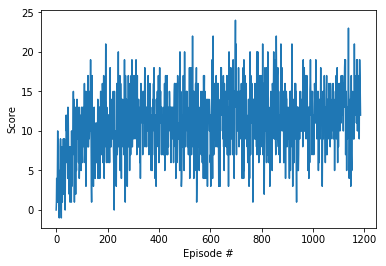

In [14]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [15]:
method='doubledqn'
alpha = 0.9
beta0 = 0.6
agent = Agent(state_size=state_size, action_size=action_size, walk_penalty=walk_penalty,
              sample_method = 'prioritized', method=method, seed=0, 
              device=device, alpha = alpha, beta0 = beta0)
scores = dqn(eps_start=1.0, prefix='Pri_a{:.2f}_b{:.2f}_'.format(alpha, beta0) + method)

Episode 100	Average Score: 6.41, Recent Score: 3.00
Episode 200	Average Score: 9.27, Recent Score: 13.00
Episode 300	Average Score: 9.92, Recent Score: 18.000
Episode 400	Average Score: 9.92, Recent Score: 9.0000
Episode 500	Average Score: 10.05, Recent Score: 11.00
Episode 600	Average Score: 10.46, Recent Score: 6.000
Episode 700	Average Score: 11.61, Recent Score: 10.00
Episode 800	Average Score: 11.64, Recent Score: 9.000
Episode 900	Average Score: 10.12, Recent Score: 15.00
Episode 1000	Average Score: 12.00, Recent Score: 13.00
Episode 1100	Average Score: 11.97, Recent Score: 14.00
Episode 1200	Average Score: 11.03, Recent Score: 16.00
Episode 1300	Average Score: 10.45, Recent Score: 4.000
Episode 1400	Average Score: 11.95, Recent Score: 16.00
Episode 1500	Average Score: 11.75, Recent Score: 12.00
Episode 1600	Average Score: 12.31, Recent Score: 10.00
Episode 1700	Average Score: 12.08, Recent Score: 14.00
Episode 1800	Average Score: 12.04, Recent Score: 9.000
Episode 1900	Average S

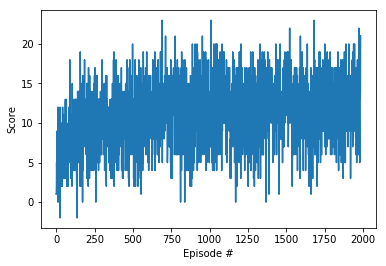

In [16]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [17]:
method='doubledqn'
alpha = 0.9
beta0 = 0.4
agent = Agent(state_size=state_size, action_size=action_size, walk_penalty=walk_penalty,
              sample_method = 'prioritized', method=method, seed=0, 
              device=device, alpha = alpha, beta0 = beta0)
scores = dqn(eps_start=1.0, prefix='Pri_a{:.2f}_b{:.2f}_'.format(alpha, beta0) + method)

Episode 100	Average Score: 7.57, Recent Score: 9.00
Episode 200	Average Score: 9.85, Recent Score: 13.00
Episode 300	Average Score: 10.28, Recent Score: 1.000
Episode 400	Average Score: 10.78, Recent Score: 13.00
Episode 500	Average Score: 10.40, Recent Score: 9.000
Episode 600	Average Score: 10.59, Recent Score: 11.00
Episode 700	Average Score: 10.23, Recent Score: 9.000
Episode 800	Average Score: 9.00, Recent Score: 5.0000
Episode 900	Average Score: 9.86, Recent Score: 9.000
Episode 1000	Average Score: 9.58, Recent Score: 17.00
Episode 1100	Average Score: 11.23, Recent Score: 11.00
Episode 1200	Average Score: 10.95, Recent Score: 11.00
Episode 1300	Average Score: 10.73, Recent Score: 12.00
Episode 1400	Average Score: 11.54, Recent Score: 10.00
Episode 1500	Average Score: 10.40, Recent Score: 9.000
Episode 1600	Average Score: 11.68, Recent Score: 10.00
Episode 1700	Average Score: 12.03, Recent Score: 15.00
Episode 1800	Average Score: 12.41, Recent Score: 15.00
Episode 1847	Average Sco

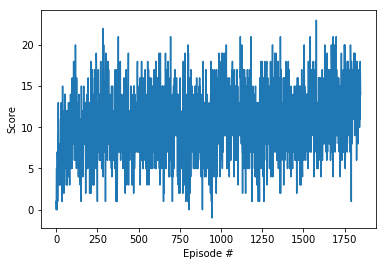

In [18]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [19]:
method='doubledqn'
alpha = 0.6
beta0 = 0.8
agent = Agent(state_size=state_size, action_size=action_size, walk_penalty=walk_penalty,
              sample_method = 'prioritized', method=method, seed=0, 
              device=device, alpha = alpha, beta0 = beta0)
scores = dqn(eps_start=1.0, prefix='Pri_a{:.2f}_b{:.2f}_'.format(alpha, beta0) + method)

Episode 100	Average Score: 7.62, Recent Score: 14.00
Episode 200	Average Score: 9.71, Recent Score: 9.000
Episode 300	Average Score: 11.51, Recent Score: 13.00
Episode 400	Average Score: 11.33, Recent Score: 11.00
Episode 500	Average Score: 11.07, Recent Score: 10.00
Episode 600	Average Score: 11.80, Recent Score: 9.000
Episode 700	Average Score: 11.56, Recent Score: 21.00
Episode 800	Average Score: 11.19, Recent Score: 18.00
Episode 900	Average Score: 12.28, Recent Score: 10.00
Episode 1000	Average Score: 12.39, Recent Score: 15.00
Episode 1100	Average Score: 12.12, Recent Score: 10.00
Episode 1200	Average Score: 12.06, Recent Score: 17.00
Episode 1300	Average Score: 12.40, Recent Score: 14.00
Episode 1326	Average Score: 13.00, Recent Score: 21.00
Environment solved in 1226 episodes!	Average Score: 13.00,  Recent Score: 21.00


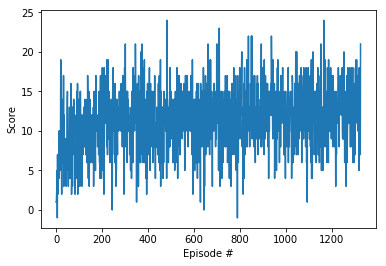

In [20]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [21]:
method='doubledqn'
alpha = 0.6
beta0 = 0.6
agent = Agent(state_size=state_size, action_size=action_size, walk_penalty=walk_penalty,
              sample_method = 'prioritized', method=method, seed=0, 
              device=device, alpha = alpha, beta0 = beta0)
scores = dqn(eps_start=1.0, prefix='Pri_a{:.2f}_b{:.2f}_'.format(alpha, beta0) + method)

Episode 100	Average Score: 8.38, Recent Score: 13.00
Episode 200	Average Score: 10.16, Recent Score: 11.00
Episode 300	Average Score: 10.35, Recent Score: 14.00
Episode 400	Average Score: 10.49, Recent Score: 7.000
Episode 500	Average Score: 11.06, Recent Score: 9.000
Episode 600	Average Score: 10.80, Recent Score: 9.000
Episode 700	Average Score: 11.01, Recent Score: 12.00
Episode 800	Average Score: 11.71, Recent Score: 14.00
Episode 900	Average Score: 11.30, Recent Score: 14.00
Episode 1000	Average Score: 10.81, Recent Score: 16.00
Episode 1100	Average Score: 11.49, Recent Score: 13.00
Episode 1200	Average Score: 12.44, Recent Score: 13.00
Episode 1244	Average Score: 13.03, Recent Score: 14.00
Environment solved in 1144 episodes!	Average Score: 13.03,  Recent Score: 14.00


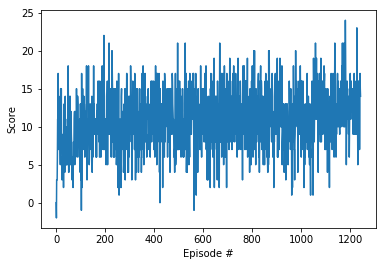

In [22]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [23]:
method='doubledqn'
alpha = 0.6
beta0 = 0.4
agent = Agent(state_size=state_size, action_size=action_size, walk_penalty=walk_penalty,
              sample_method = 'prioritized', method=method, seed=0, 
              device=device, alpha = alpha, beta0 = beta0)
scores = dqn(eps_start=1.0, prefix='Pri_a{:.2f}_b{:.2f}_'.format(alpha, beta0) + method)

Episode 100	Average Score: 9.20, Recent Score: 17.00
Episode 200	Average Score: 9.59, Recent Score: 8.0000
Episode 300	Average Score: 10.46, Recent Score: 13.00
Episode 400	Average Score: 9.93, Recent Score: 15.000
Episode 500	Average Score: 11.13, Recent Score: 6.000
Episode 600	Average Score: 11.02, Recent Score: 2.000
Episode 700	Average Score: 9.89, Recent Score: 7.0000
Episode 800	Average Score: 10.67, Recent Score: 6.000
Episode 900	Average Score: 10.42, Recent Score: 13.00
Episode 1000	Average Score: 10.54, Recent Score: 9.00
Episode 1100	Average Score: 10.49, Recent Score: 15.00
Episode 1200	Average Score: 11.02, Recent Score: 9.000
Episode 1300	Average Score: 10.49, Recent Score: 11.00
Episode 1400	Average Score: 11.00, Recent Score: 6.000
Episode 1500	Average Score: 10.93, Recent Score: 16.00
Episode 1600	Average Score: 11.42, Recent Score: 10.00
Episode 1700	Average Score: 12.51, Recent Score: 15.00
Episode 1800	Average Score: 12.72, Recent Score: 9.000
Episode 1808	Average 

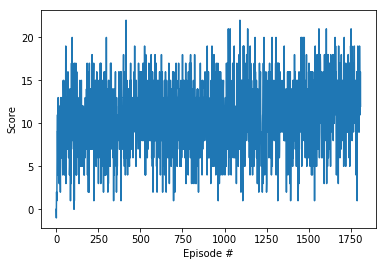

In [24]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

---

### Prioritized Sampling -  DQN

In [25]:
method='dqn'
alpha = 0.9
beta0 = 0.8
agent = Agent(state_size=state_size, action_size=action_size, walk_penalty=walk_penalty,
              sample_method = 'prioritized', method=method, seed=0, 
              device=device, alpha = alpha, beta0 = beta0)
scores = dqn(eps_start=1.0, prefix='Pri_a{:.2f}_b{:.2f}_'.format(alpha, beta0) + method)

Episode 100	Average Score: 7.39, Recent Score: 15.00
Episode 200	Average Score: 9.94, Recent Score: 15.00
Episode 300	Average Score: 10.26, Recent Score: 15.00
Episode 400	Average Score: 11.16, Recent Score: 6.000
Episode 500	Average Score: 11.40, Recent Score: 13.00
Episode 600	Average Score: 10.32, Recent Score: 14.00
Episode 700	Average Score: 11.87, Recent Score: 12.00
Episode 800	Average Score: 11.40, Recent Score: 14.00
Episode 900	Average Score: 11.91, Recent Score: 11.00
Episode 1000	Average Score: 12.07, Recent Score: 24.00
Episode 1100	Average Score: 11.53, Recent Score: 12.00
Episode 1200	Average Score: 11.32, Recent Score: 9.000
Episode 1300	Average Score: 11.18, Recent Score: 16.00
Episode 1399	Average Score: 13.03, Recent Score: 21.00
Environment solved in 1299 episodes!	Average Score: 13.03,  Recent Score: 21.00


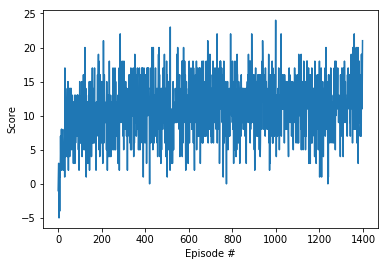

In [26]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [27]:
method='dqn'
alpha = 0.9
beta0 = 0.6
agent = Agent(state_size=state_size, action_size=action_size, walk_penalty=walk_penalty,
              sample_method = 'prioritized', method=method, seed=0, 
              device=device, alpha = alpha, beta0 = beta0)
scores = dqn(eps_start=1.0, prefix='Pri_a{:.2f}_b{:.2f}_'.format(alpha, beta0) + method)

Episode 100	Average Score: 5.80, Recent Score: 0.00
Episode 200	Average Score: 9.93, Recent Score: 10.00
Episode 300	Average Score: 10.22, Recent Score: 13.00
Episode 400	Average Score: 10.65, Recent Score: 8.000
Episode 500	Average Score: 10.86, Recent Score: 13.00
Episode 600	Average Score: 9.99, Recent Score: 10.000
Episode 700	Average Score: 10.17, Recent Score: 12.00
Episode 800	Average Score: 10.36, Recent Score: 11.00
Episode 900	Average Score: 10.95, Recent Score: 9.000
Episode 1000	Average Score: 10.87, Recent Score: 6.00
Episode 1100	Average Score: 10.58, Recent Score: 14.00
Episode 1200	Average Score: 11.21, Recent Score: 12.00
Episode 1300	Average Score: 11.88, Recent Score: 13.00
Episode 1400	Average Score: 11.64, Recent Score: 11.00
Episode 1500	Average Score: 11.46, Recent Score: 10.00
Episode 1600	Average Score: 12.07, Recent Score: 8.000
Episode 1700	Average Score: 12.61, Recent Score: 13.00
Episode 1800	Average Score: 12.32, Recent Score: 18.00
Episode 1900	Average Sc

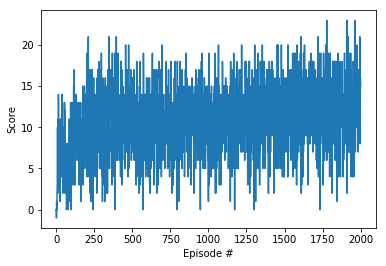

In [28]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [29]:
method='dqn'
alpha = 0.9
beta0 = 0.4
agent = Agent(state_size=state_size, action_size=action_size, walk_penalty=walk_penalty,
              sample_method = 'prioritized', method=method, seed=0, 
              device=device, alpha = alpha, beta0 = beta0)
scores = dqn(eps_start=1.0, prefix='Pri_a{:.2f}_b{:.2f}_'.format(alpha, beta0) + method)

Episode 100	Average Score: 6.82, Recent Score: 8.00
Episode 200	Average Score: 8.46, Recent Score: 12.00
Episode 300	Average Score: 8.98, Recent Score: 10.00
Episode 400	Average Score: 9.19, Recent Score: 14.000
Episode 500	Average Score: 8.47, Recent Score: 12.00
Episode 600	Average Score: 8.49, Recent Score: 5.000
Episode 700	Average Score: 8.80, Recent Score: 7.000
Episode 800	Average Score: 9.68, Recent Score: 8.0000
Episode 900	Average Score: 10.00, Recent Score: 9.000
Episode 1000	Average Score: 10.87, Recent Score: 8.00
Episode 1100	Average Score: 10.34, Recent Score: 12.00
Episode 1200	Average Score: 11.02, Recent Score: 9.000
Episode 1300	Average Score: 11.16, Recent Score: 11.00
Episode 1400	Average Score: 12.44, Recent Score: 18.00
Episode 1500	Average Score: 11.33, Recent Score: 17.00
Episode 1600	Average Score: 10.93, Recent Score: 12.00
Episode 1699	Average Score: 13.00, Recent Score: 12.00
Environment solved in 1599 episodes!	Average Score: 13.00,  Recent Score: 12.00


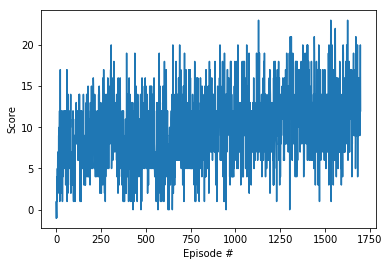

In [30]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [31]:
method='dqn'
alpha = 0.6
beta0 = 0.8
agent = Agent(state_size=state_size, action_size=action_size, walk_penalty=walk_penalty,
              sample_method = 'prioritized', method=method, seed=0, 
              device=device, alpha = alpha, beta0 = beta0)
scores = dqn(eps_start=1.0, prefix='Pri_a{:.2f}_b{:.2f}_'.format(alpha, beta0) + method)

Episode 100	Average Score: 6.91, Recent Score: 7.00
Episode 200	Average Score: 10.21, Recent Score: 13.00
Episode 300	Average Score: 10.17, Recent Score: 9.000
Episode 400	Average Score: 9.76, Recent Score: 15.000
Episode 500	Average Score: 10.22, Recent Score: 11.00
Episode 600	Average Score: 10.69, Recent Score: 12.00
Episode 700	Average Score: 10.91, Recent Score: 12.00
Episode 800	Average Score: 11.03, Recent Score: 9.000
Episode 900	Average Score: 10.76, Recent Score: 15.00
Episode 1000	Average Score: 11.70, Recent Score: 11.00
Episode 1100	Average Score: 11.28, Recent Score: 19.00
Episode 1200	Average Score: 10.82, Recent Score: 8.000
Episode 1300	Average Score: 12.01, Recent Score: 14.00
Episode 1400	Average Score: 11.85, Recent Score: 6.000
Episode 1500	Average Score: 10.82, Recent Score: 11.00
Episode 1600	Average Score: 11.39, Recent Score: 12.00
Episode 1700	Average Score: 11.15, Recent Score: 13.00
Episode 1800	Average Score: 12.16, Recent Score: 17.00
Episode 1900	Average 

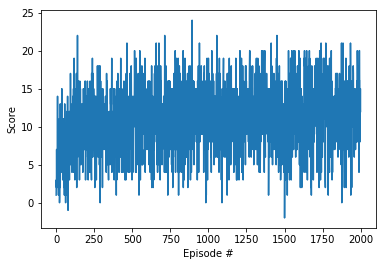

In [32]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [33]:
method='dqn'
alpha = 0.6
beta0 = 0.6
agent = Agent(state_size=state_size, action_size=action_size, walk_penalty=walk_penalty,
              sample_method = 'prioritized', method=method, seed=0, 
              device=device, alpha = alpha, beta0 = beta0)
scores = dqn(eps_start=1.0, prefix='Pri_a{:.2f}_b{:.2f}_'.format(alpha, beta0) + method)

Episode 100	Average Score: 5.41, Recent Score: 8.00
Episode 200	Average Score: 9.05, Recent Score: 8.000
Episode 300	Average Score: 9.27, Recent Score: 13.00
Episode 400	Average Score: 8.89, Recent Score: 9.000
Episode 500	Average Score: 10.58, Recent Score: 9.000
Episode 600	Average Score: 10.11, Recent Score: 13.00
Episode 700	Average Score: 9.67, Recent Score: 6.0000
Episode 800	Average Score: 11.99, Recent Score: 13.00
Episode 900	Average Score: 10.97, Recent Score: 11.00
Episode 1000	Average Score: 11.57, Recent Score: 3.00
Episode 1100	Average Score: 11.32, Recent Score: 13.00
Episode 1200	Average Score: 10.83, Recent Score: 5.000
Episode 1300	Average Score: 10.79, Recent Score: 12.00
Episode 1400	Average Score: 11.13, Recent Score: 13.00
Episode 1500	Average Score: 10.85, Recent Score: 7.000
Episode 1600	Average Score: 11.51, Recent Score: 11.00
Episode 1700	Average Score: 11.71, Recent Score: 8.000
Episode 1800	Average Score: 11.79, Recent Score: 15.00
Episode 1900	Average Scor

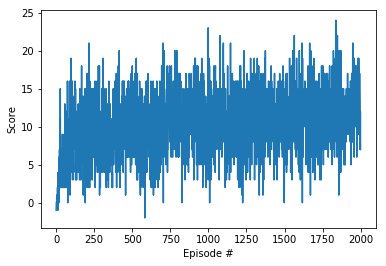

In [34]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [35]:
method='dqn'
alpha = 0.6
beta0 = 0.4
agent = Agent(state_size=state_size, action_size=action_size, walk_penalty=walk_penalty,
              sample_method = 'prioritized', method=method, seed=0, 
              device=device, alpha = alpha, beta0 = beta0)
scores = dqn(eps_start=1.0, prefix='Pri_a{:.2f}_b{:.2f}_'.format(alpha, beta0) + method)

Episode 100	Average Score: 8.18, Recent Score: 5.00
Episode 200	Average Score: 8.31, Recent Score: 8.000
Episode 300	Average Score: 8.84, Recent Score: 13.00
Episode 400	Average Score: 8.65, Recent Score: 6.000
Episode 500	Average Score: 8.70, Recent Score: 10.00
Episode 600	Average Score: 9.84, Recent Score: 15.00
Episode 700	Average Score: 10.06, Recent Score: 8.000
Episode 800	Average Score: 10.68, Recent Score: 15.00
Episode 900	Average Score: 9.51, Recent Score: 11.000
Episode 1000	Average Score: 9.06, Recent Score: 5.00
Episode 1100	Average Score: 8.84, Recent Score: 9.000
Episode 1200	Average Score: 11.27, Recent Score: 14.00
Episode 1300	Average Score: 11.35, Recent Score: 10.00
Episode 1400	Average Score: 11.78, Recent Score: 10.00
Episode 1500	Average Score: 11.11, Recent Score: 17.00
Episode 1600	Average Score: 11.44, Recent Score: 16.00
Episode 1700	Average Score: 11.14, Recent Score: 13.00
Episode 1800	Average Score: 12.52, Recent Score: 15.00
Episode 1900	Average Score: 1

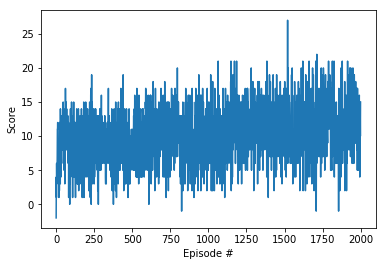

In [36]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Uniform Experience Replay

Uniform experience replay is simply the batch-uniform sampling of the buffered (s', r', s, a) experience tuples. This buffer is implemented in `buffers/ReplayBuffer.py`


In [19]:
method='doubledqn'
agent = Agent(state_size=state_size, action_size=action_size, walk_penalty=walk_penalty,
              sample_method = 'uniform', method=method, seed=0)
scores = dqn(eps_start=1.0, eps_decay=0.995, prefix='Unif_ddqn_' + method)

Episode 100	Average Score: 8.93, Recent Score: 7.00
Episode 200	Average Score: 11.05, Recent Score: 8.000
Episode 300	Average Score: 12.07, Recent Score: 14.00
Episode 400	Average Score: 12.46, Recent Score: 14.00
Episode 428	Average Score: 13.04, Recent Score: 17.00
Environment solved in 328 episodes!	Average Score: 13.04,  Recent Score: 17.00


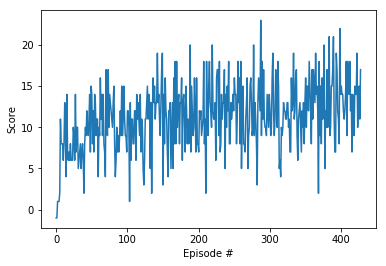

In [20]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [21]:
method='dqn'
agent = Agent(state_size=state_size, action_size=action_size, walk_penalty=walk_penalty,
              sample_method = 'uniform', method=method, seed=0)
scores = dqn(eps_start=1.0, eps_decay=0.995, prefix='Unif_dqn_' + method)

Episode 100	Average Score: 7.43, Recent Score: 13.00
Episode 200	Average Score: 9.61, Recent Score: 12.00
Episode 300	Average Score: 11.17, Recent Score: 12.00
Episode 400	Average Score: 11.79, Recent Score: 8.000
Episode 500	Average Score: 12.59, Recent Score: 16.00
Episode 600	Average Score: 11.92, Recent Score: 12.00
Episode 700	Average Score: 11.57, Recent Score: 12.00
Episode 800	Average Score: 11.90, Recent Score: 17.00
Episode 860	Average Score: 13.00, Recent Score: 14.00
Environment solved in 760 episodes!	Average Score: 13.00,  Recent Score: 14.00


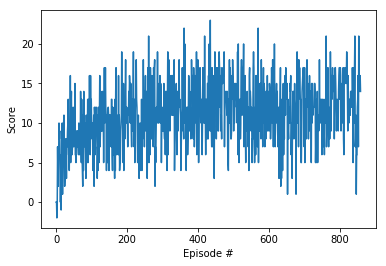

In [22]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Discussion


#### Experience replay
As we can see, prioritized sampling took longer to solve the environment than uniform sampling. I suspect that this is due to the over-representation of no-reward (i.e. 0) states. The agent could take a long while before any non-zero reward is obtained, and in the meanwhile, many of these states are likely to be repeated with varying degrees of returns (depending on when the return is obtained down the road). This means, that the likelihood of same no-reward states are sampled multiple times yielding different TD errrors, thus causing oscillatory learning, since same states have different returns (credit assignment problem). 

Moreover, notice that higher `alpha` and `beta0` values, yield faster solutions. This means that a potential way to deal with the credit assignment problem is by reducing their contradictory contribution to the learning process. However, the harm in doing this is that this reduces the impact meaningfully accredited experiences have on learning as well. 

One solution I experimented with is the introduction of a "walk" penalty. That is, introduce a small negative reward (in the order of -0.005) for each no-return walking action. This yields assigns more meaningful rewards to the previously no-return state-action pairs. I noticed that this sped up training drastically with prioritized experience replay. However, the learning would plateau at about averge 11-12 returns thus making it harder to reach the average 13 solution mark.

Uniform sampling yields faster solution. This is likely to the fact that the impact that meaningful state-action pairs have on the learning is not reduced, while the potentially contradictorily accredited experiences end up cancelling each other.

#### DQN vs. Double DQN

Double DQN overall performs better than DQN under the same sampling strategy.